In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def show(img):
    cv2.imshow("image",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
img  = cv2.imread("data/semafor.bmp",0)
# template = cv2.imread("data/Image2.jpg",0)
template = np.array([[255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255],
                     [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255]])
p = np.array([[255, 255, 255,255,255, 255, 255, 255,255, 255, 255,255,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 0,0,0,0,0,0,0,0,0,0,0,255],
              [255, 255, 255, 255,255, 255, 255, 255,255, 255, 255,255,255]])

In [4]:
template[0].shape

(67,)

In [6]:
print(template.shape)
print(img.shape)
h_t, w_t = template.shape

(51, 67)
(276, 393)


In [7]:
def center(image):
    a,b = image.shape
    return a//2, b//2

In [8]:
def count_match(image, temp,a,b):
    c = 0
    for u in range(w_t):
        for v in range(h_t):
            if temp[v,u] == image[v+b,u+a]:
                c += 1
    return c

In [21]:
def check(i,t):
    p,q = center(t)
    h,w  = img.shape
    h_t, w_t = template.shape
    empty = np.zeros((h-h_t+1,w-w_t+1))
#     print(h,w)
    for i in range(w-w_t+1):
        for j in range(h-h_t+1):
            c = count_match(img,template,i,j)
            empty[j,i] = c
#             print(i,j,c)
    return empty

In [22]:
e = check(img,template)

In [11]:
e_t = e

In [12]:
m = e.max()
e *= (255/m)

In [13]:
show(e.astype('uint8'))

In [14]:
e_n = e.astype('uint8')

In [15]:
e_n

array([[173, 178, 184, ..., 193, 189, 186],
       [180, 186, 192, ..., 201, 197, 193],
       [188, 194, 200, ..., 209, 205, 201],
       ...,
       [204, 210, 217, ..., 226, 222, 217],
       [197, 203, 209, ..., 218, 214, 210],
       [189, 195, 201, ..., 210, 206, 202]], dtype=uint8)

In [16]:
e_p = e_n.copy()
e_p[e_p < 255 ] = 0

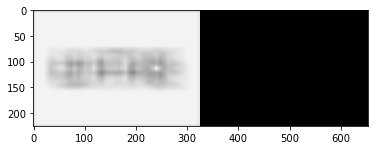

In [17]:
final = np.hstack((e_n,e_p))
plt.imshow(final,cmap='gray')
show(final)